In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance


In [10]:
df = pd.read_csv('Final_Data.csv')

In [11]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Hour,Is_Night,Residual_Power,Rolling_Mean_10min,Rolling_Mean_1h,Rolling_Mean_24h,Energy_Deviation
0,4.216,0.418,234.84,0.0,1.0,17.0,2006,17,0,52.266667,4.216000,4.216000,4.216000,0.000000
1,5.360,0.436,233.63,0.0,1.0,16.0,2006,17,0,72.333333,4.788000,4.788000,4.788000,0.572000
2,5.374,0.498,233.29,0.0,2.0,17.0,2006,17,0,70.566667,4.983333,4.983333,4.983333,0.390667
3,5.388,0.502,233.74,0.0,1.0,17.0,2006,17,0,71.800000,5.084500,5.084500,5.084500,0.303500
4,3.666,0.528,235.68,0.0,1.0,17.0,2006,17,0,43.100000,4.800800,4.800800,4.800800,-1.134800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Sub_metering_1         float64
 4   Sub_metering_2         float64
 5   Sub_metering_3         float64
 6   Year                   int64  
 7   Hour                   int64  
 8   Is_Night               int64  
 9   Residual_Power         float64
 10  Rolling_Mean_10min     float64
 11  Rolling_Mean_1h        float64
 12  Rolling_Mean_24h       float64
 13  Energy_Deviation       float64
dtypes: float64(11), int64(3)
memory usage: 218.9 MB


In [13]:
sampled_df = df.sample(frac=0.3, random_state=42)  # Sample 30% of the data

Plotting the feature importance of the model: Linear Regression


C:\Users\gkama\AppData\Local\Temp\ipykernel_5932\789524614.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette='coolwarm')


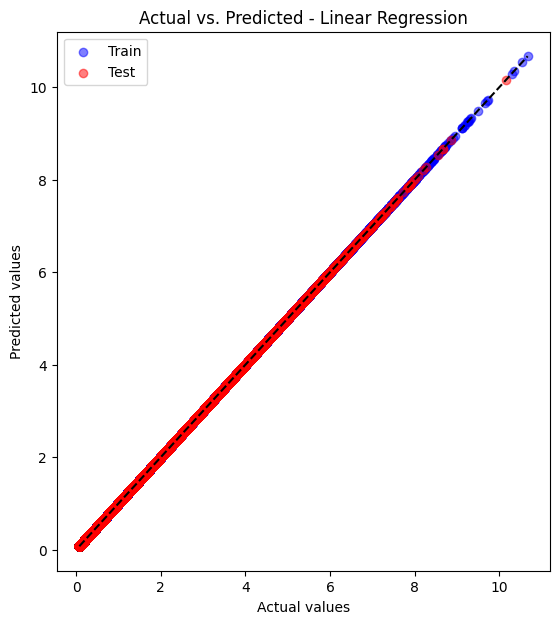

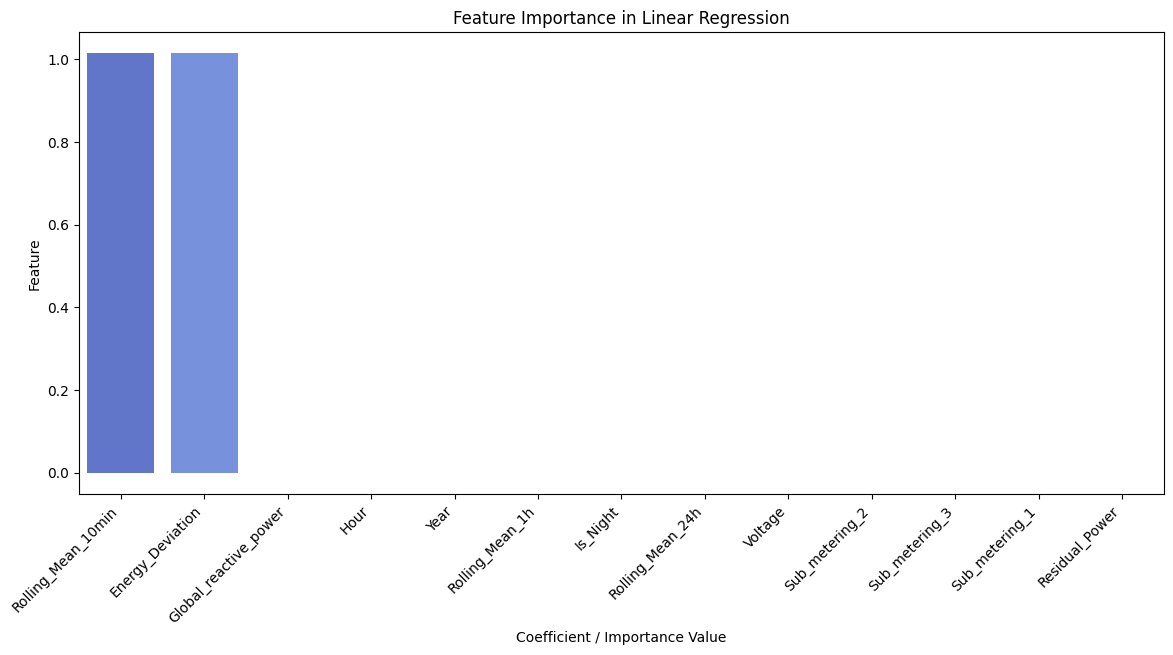

Plotting the feature importance of the model: Random Forest


C:\Users\gkama\AppData\Local\Temp\ipykernel_5932\789524614.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette='coolwarm')
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


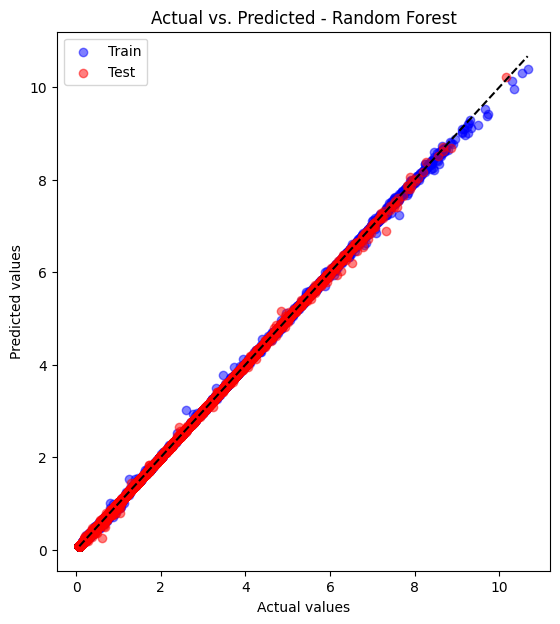

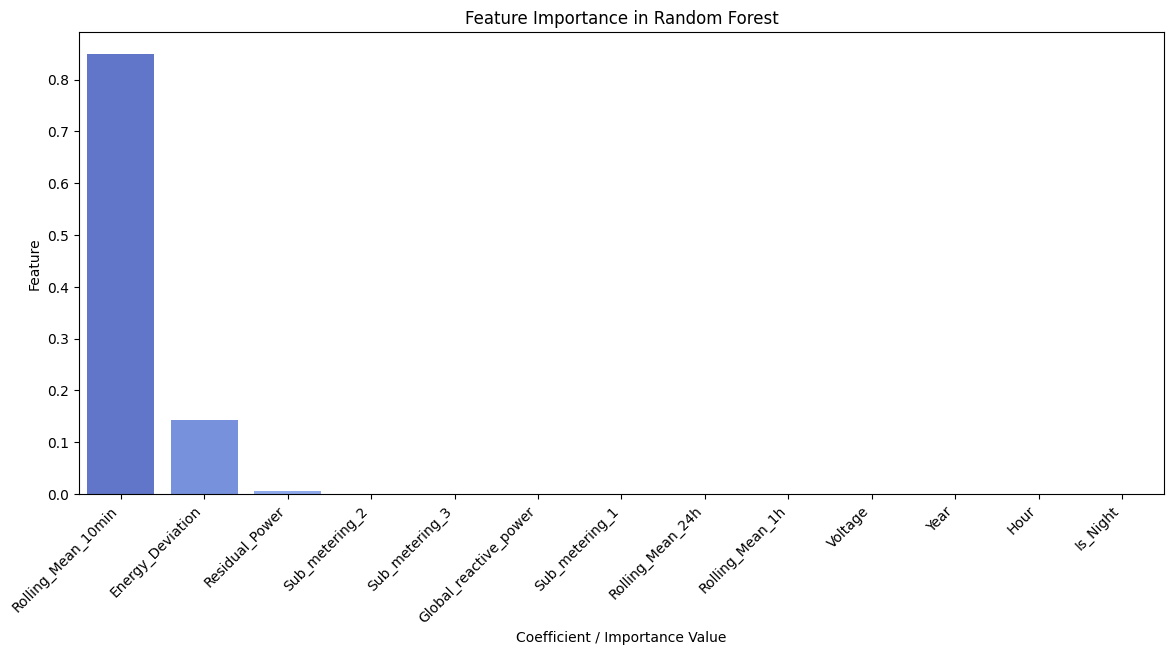

Plotting the feature importance of the model: Gradient Boosting


C:\Users\gkama\AppData\Local\Temp\ipykernel_5932\789524614.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette='coolwarm')


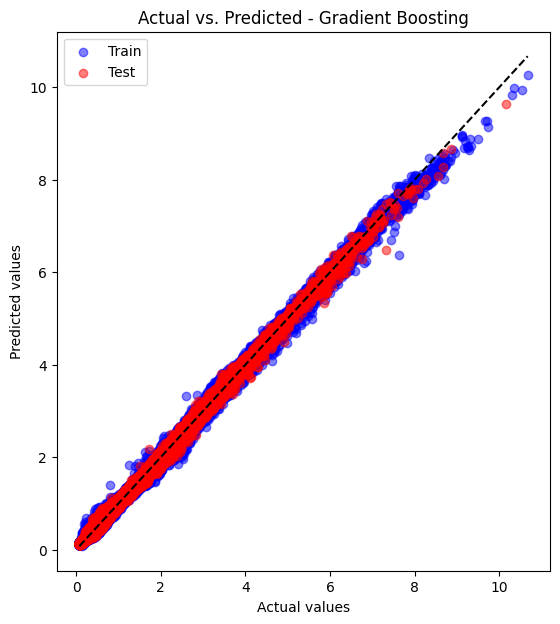

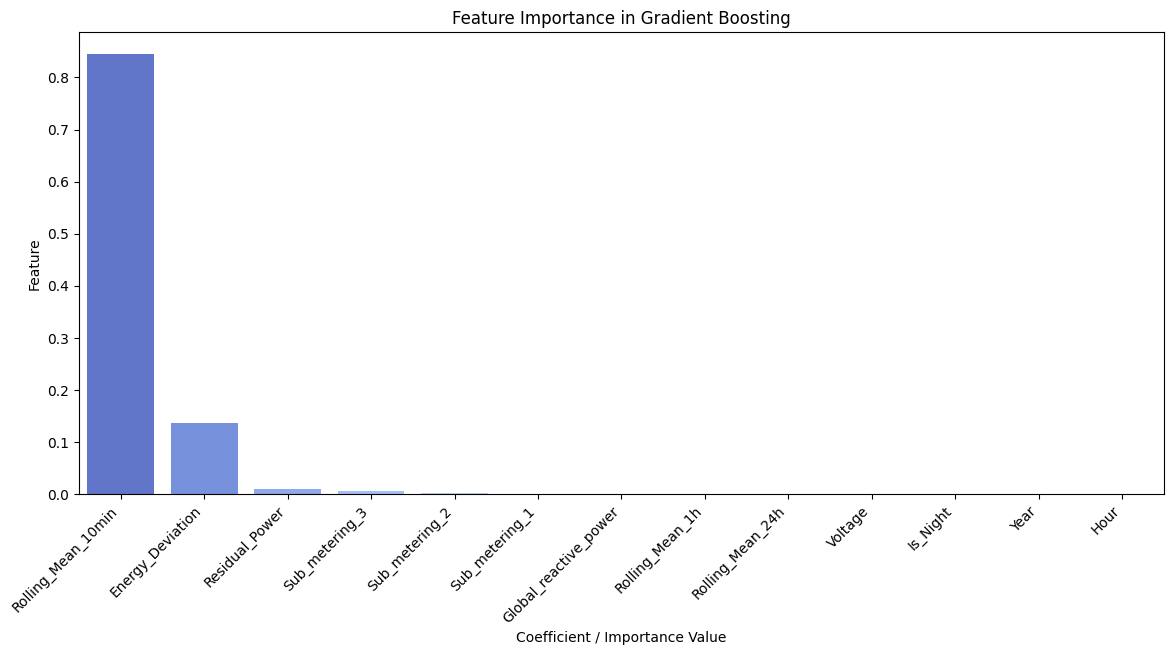

Computing feature importance for Neural Networks...


C:\Users\gkama\AppData\Local\Temp\ipykernel_5932\789524614.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Feature"], y=importance_df["Importance"], palette="coolwarm")


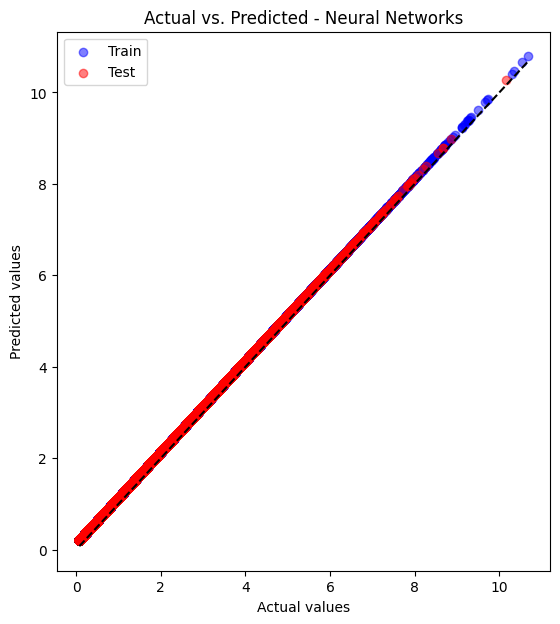

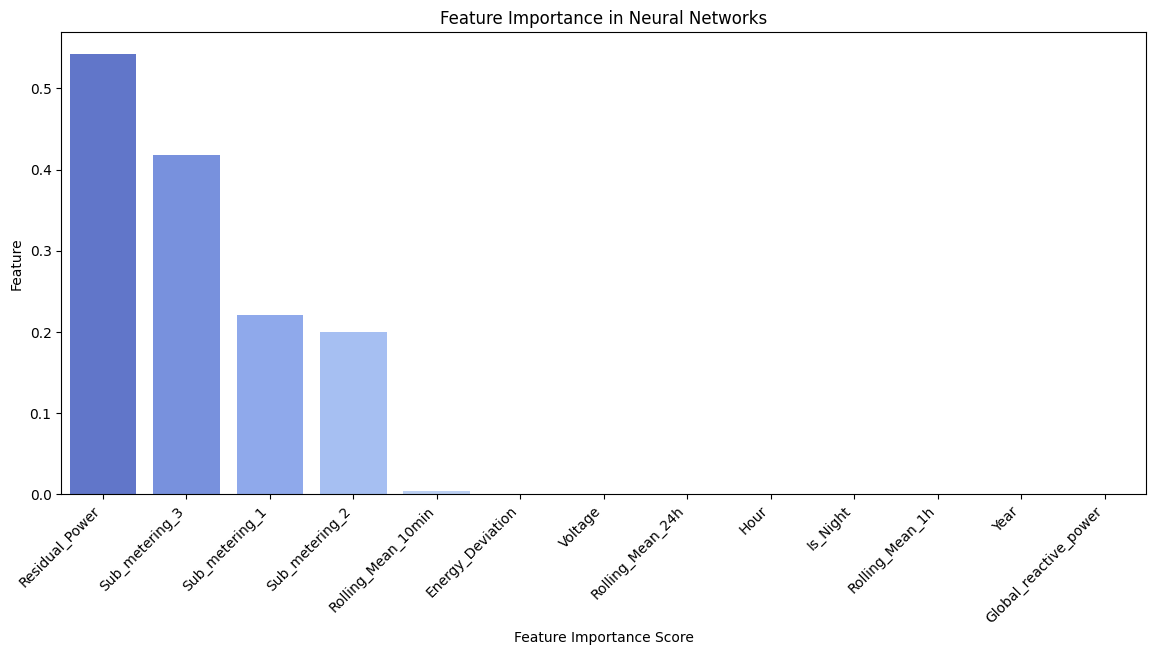

Plotting the feature importance of the model: XGBoost


C:\Users\gkama\AppData\Local\Temp\ipykernel_5932\789524614.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette='coolwarm')
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


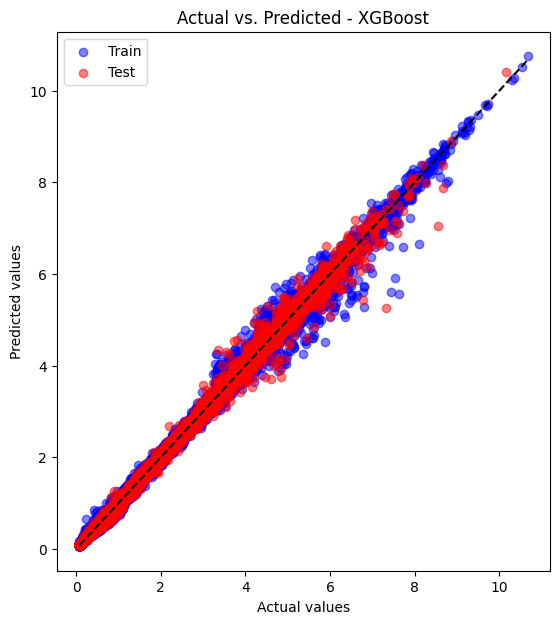

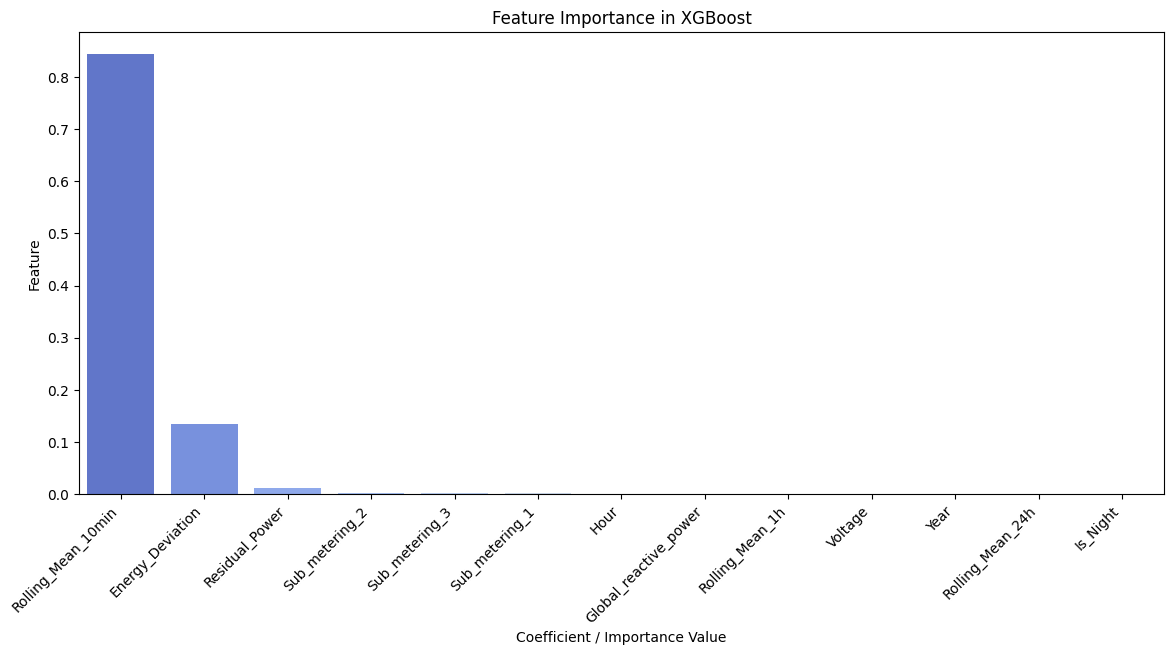

Computing feature importance for K-Nearest Neighbors...


C:\Users\gkama\AppData\Local\Temp\ipykernel_5932\789524614.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Feature"], y=importance_df["Importance"], palette="coolwarm")


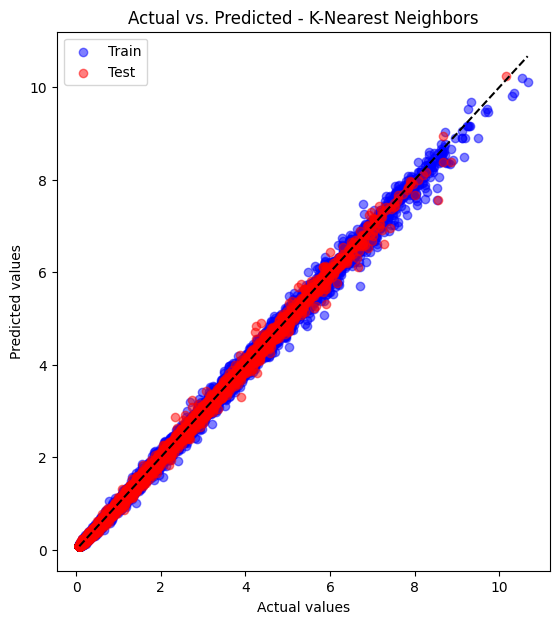

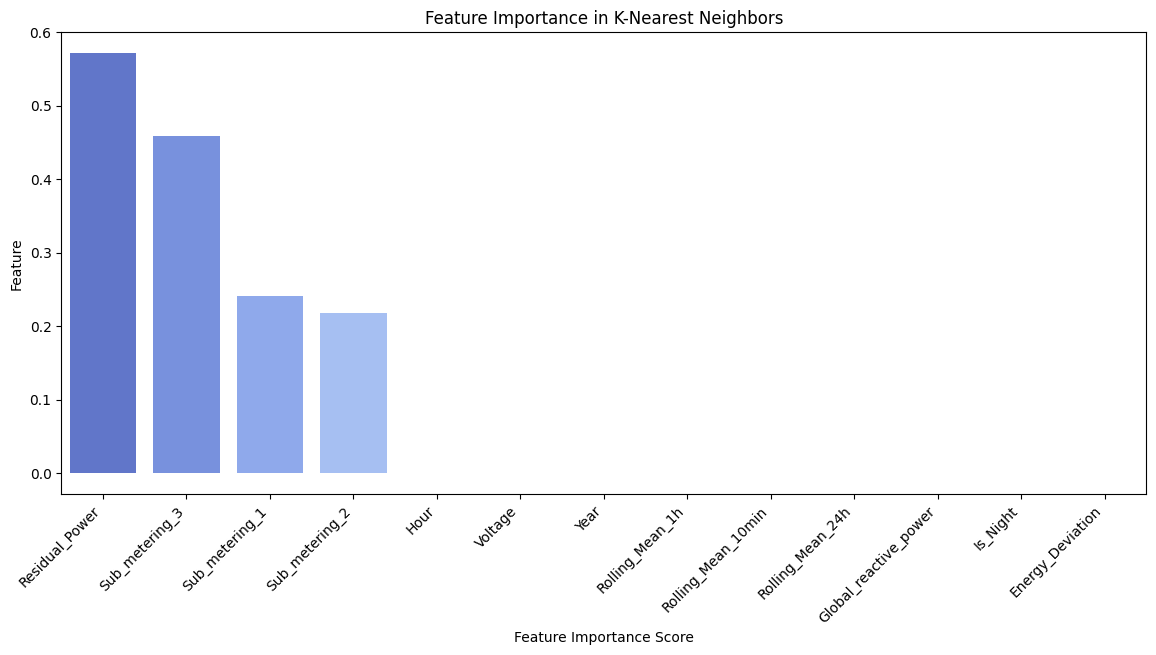

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Linear Regression,1.752776e-15,1.762347e-15,1.294765e-15,1.299856e-15,1.000000,1.000000
1,Random Forest,3.165883e-03,6.520856e-03,5.715380e-04,1.356697e-03,0.999991,0.999962
2,Gradient Boosting,4.135426e-02,4.206650e-02,2.644520e-02,2.674623e-02,0.998473,0.998430
3,Neural Networks,1.321088e-01,1.321092e-01,1.321043e-01,1.321047e-01,0.984417,0.984514
4,XGBoost,3.260214e-02,4.058587e-02,1.644972e-02,1.764439e-02,0.999051,0.998538
5,K-Nearest Neighbors,2.275049e-02,2.865331e-02,1.180243e-02,1.490435e-02,0.999538,0.999271


In [15]:
# Splitting features and target
X = sampled_df.drop('Global_active_power', axis=1)
y = sampled_df['Global_active_power']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Neural Networks': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2
    })


    # Plotting model performance - Actual vs. Predicted values
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train')
    plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')
    plt.title(f'Actual vs. Predicted - {name}')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')

    if hasattr(model, 'feature_importances_'):   
        print(f'Plotting the feature importance of the model: {name}')
        feature_importance = model.feature_importances_
        feature_names = X.columns 
        importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)
        plt.figure(figsize=(14, 6))
        plt.xticks(rotation=45, ha="right", fontsize=10)
        sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette='coolwarm')
        plt.xlabel('Coefficient / Importance Value')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance in {name}')
        plt.show() 
    

    elif hasattr(model, 'coef_'): 
        print(f'Plotting the feature importance of the model: {name}')
        feature_importance = model.coef_
        feature_names = X.columns
        importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)
        plt.figure(figsize=(14, 6))
        plt.xticks(rotation=45, ha="right", fontsize=10)
        sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette='coolwarm')
        plt.xlabel('Coefficient / Importance Value')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance in {name}')
        plt.show() 
    
    
    else:
        feature_importance = None
        print(f"Computing feature importance for {name}...")
        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42)  
        importance_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
        importance_df = importance_df.sort_values("Importance", ascending=False)
        plt.figure(figsize=(14, 6))
        plt.xticks(rotation=45, ha="right", fontsize=10)
        sns.barplot(x=importance_df["Feature"], y=importance_df["Importance"], palette="coolwarm")
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Feature")
        plt.title(f"Feature Importance in {name}")
        plt.show()

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df